In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv('heartdisease.csv', header = None)
training_x=df.iloc[1:df.shape[0],0:13]
training_y=df.iloc[1:df.shape[0],13:14]
x=np.array(training_x)
y=np.array(training_y)
print(x.shape)

(303, 13)


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
print(X_scaled.shape)
X_augmented = X_scaled.copy()
y_augmented = y.copy()
#adding noise
noise_range = (-0.1,0.1)
for i in range(len(x)):
    noise_factor = np.random.uniform(*noise_range)
    X_augmented[i] = X_scaled[i] +noise_factor
# Concatenate augmented and original data
X_combined = np.concatenate((X_scaled, X_augmented), axis=0)
y_combined = np.concatenate((y, y_augmented), axis=0)
print(X_combined.shape)

(303, 13)
(606, 13)


In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

max=0
val=0
for i in range(0,400):
    x_train,x_test,y_train,y_test = train_test_split(X_combined,y_combined,test_size=0.2,random_state=i)

    gnb = GaussianNB()
    gnb.fit(x_train, y_train.ravel())
    y_pred = gnb.predict(x_test)
    if(max<metrics.accuracy_score(y_test, y_pred)*100):
        max=metrics.accuracy_score(y_test, y_pred)*100
        val=i
    y1=y_test.ravel()
    y_pred1=y_pred.ravel()

x_train,x_test,y_train,y_test = train_test_split(X_combined,y_combined,test_size=0.2,random_state=val)

gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())
y_pred = gnb.predict(x_test)


print("\n\nNaive Bias model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

y1=y_test.ravel()
y_pred1=y_pred.ravel()

print("\n\nF1 Score")
f_score=f1_score(y1,y_pred1,average='weighted')
print(f_score)

precision = precision_score(y1, y_pred1,average='weighted')
print("\n\nPrecision:", precision)
print("\n\nConfusion Matrix")
cf_matrix=confusion_matrix(y1,y_pred1)
print(cf_matrix)

TN = cf_matrix[0, 0]
FP = cf_matrix[0, 1]
FN = cf_matrix[1, 0]
TP = cf_matrix[1, 1]

specificity = TN / (TN + FP)
print("\n\n\nSpecificity:", specificity)
report = classification_report(y1, y_pred1)
print(report)




Naive Bias model accuracy(in %): 70.49180327868852


F1 Score
0.7143721468644454


Precision: 0.7359158585431232


Confusion Matrix
[[69  4  3  1  1]
 [ 3  5  1  4  0]
 [ 2  6  5  4  0]
 [ 0  3  1  5  0]
 [ 0  1  2  0  2]]



Specificity: 0.9452054794520548
              precision    recall  f1-score   support

           0       0.93      0.88      0.91        78
           1       0.26      0.38      0.31        13
           2       0.42      0.29      0.34        17
           3       0.36      0.56      0.43         9
           4       0.67      0.40      0.50         5

    accuracy                           0.70       122
   macro avg       0.53      0.50      0.50       122
weighted avg       0.74      0.70      0.71       122



In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import svm
max=0
val=0
for i in range(0,400):
    x_train,x_test,y_train,y_test = train_test_split(X_combined,y_combined,test_size=0.2,random_state=i)

    gnb = svm.SVC()
    gnb.fit(x_train, y_train.ravel())
    y_pred = gnb.predict(x_test)
    if(max<metrics.accuracy_score(y_test, y_pred)*100):
        max=metrics.accuracy_score(y_test, y_pred)*100
        val=i
    y1=y_test.ravel()
    y_pred1=y_pred.ravel()

x_train,x_test,y_train,y_test = train_test_split(X_combined,y_combined,test_size=0.2,random_state=val)
gnb = svm.SVC()
gnb.fit(x_train, y_train.ravel())
y_pred = gnb.predict(x_test)

print("\n\nSVM model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
y1=y_test.ravel()
y_pred1=y_pred.ravel()

print("\n\n\n\nF1 Score")
f_score=f1_score(y1,y_pred1,average='weighted')
print(f_score)

precision = precision_score(y1, y_pred1,average='weighted')
print("\n\n\nPrecision:", precision)
print("\n\n\n\nConfusion Matrix")
cf_matrix=confusion_matrix(y1,y_pred1)
print(cf_matrix)

TN = cf_matrix[0, 0]
FP = cf_matrix[0, 1]
FN = cf_matrix[1, 0]
TP = cf_matrix[1, 1]

specificity = TN / (TN + FP)

print("\n\n\nSpecificity:", specificity)

report = classification_report(y1, y_pred1)
print(report)



SVM model accuracy(in %): 81.9672131147541




F1 Score
0.8088205098234028



Precision: 0.8216268194349747




Confusion Matrix
[[71  2  1  0  0]
 [ 5 10  2  0  0]
 [ 2  1  9  1  0]
 [ 1  1  2  9  0]
 [ 0  2  0  2  1]]



Specificity: 0.9726027397260274
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        74
           1       0.62      0.59      0.61        17
           2       0.64      0.69      0.67        13
           3       0.75      0.69      0.72        13
           4       1.00      0.20      0.33         5

    accuracy                           0.82       122
   macro avg       0.78      0.63      0.65       122
weighted avg       0.82      0.82      0.81       122



In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

x_train,x_test,y_train,y_test = train_test_split(X_combined,y_combined,test_size=0.2,random_state=203)
model = Sequential()
model.add(Dense(13, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(30, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 175
# One-hot encode the target variables (y_train and y_test)
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)
model.fit(x_train, y_train_encoded,validation_data=(x_test,y_test_encoded), epochs=epochs,batch_size=8)
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print("Test accuracy:", accuracy)
print("Loss:", loss)

Epoch 1/175
61/61 [==============================] - 1s 5ms/step - loss: 1.5696 - accuracy: 0.3079 - val_loss: 1.3435 - val_accuracy: 0.5984
Epoch 2/175
61/61 [==============================] - 0s 2ms/step - loss: 1.2494 - accuracy: 0.5248 - val_loss: 1.0629 - val_accuracy: 0.6066
Epoch 3/175
61/61 [==============================] - 0s 2ms/step - loss: 1.0945 - accuracy: 0.5393 - val_loss: 0.9435 - val_accuracy: 0.6311
Epoch 4/175
61/61 [==============================] - 0s 2ms/step - loss: 1.0170 - accuracy: 0.5702 - val_loss: 0.8834 - val_accuracy: 0.6557
Epoch 5/175
61/61 [==============================] - 0s 2ms/step - loss: 0.9626 - accuracy: 0.6136 - val_loss: 0.8404 - val_accuracy: 0.7049
Epoch 6/175
61/61 [==============================] - 0s 2ms/step - loss: 0.9205 - accuracy: 0.6550 - val_loss: 0.8066 - val_accuracy: 0.7049
Epoch 7/175
61/61 [==============================] - 0s 2ms/step - loss: 0.8854 - accuracy: 0.6632 - val_loss: 0.7823 - val_accuracy: 0.6967
Epoch 8/175
6

Epoch 59/175
61/61 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8967 - val_loss: 0.4112 - val_accuracy: 0.8770
Epoch 60/175
61/61 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8946 - val_loss: 0.4083 - val_accuracy: 0.8607
Epoch 61/175
61/61 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.9050 - val_loss: 0.4034 - val_accuracy: 0.8770
Epoch 62/175
61/61 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8905 - val_loss: 0.3945 - val_accuracy: 0.8689
Epoch 63/175
61/61 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.9091 - val_loss: 0.3887 - val_accuracy: 0.8525
Epoch 64/175
61/61 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8926 - val_loss: 0.3840 - val_accuracy: 0.8770
Epoch 65/175
61/61 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.9132 - val_loss: 0.3793 - val_accuracy: 0.8689
Epoch 

61/61 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.0586 - val_accuracy: 0.9836
Epoch 174/175
61/61 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9836
Epoch 175/175
4/4 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9836
Test accuracy: 0.9836065769195557
Loss: 0.05783338099718094


success
iva 123
login successful
hello
cardio check works
msg box donee
cardio check works
[ 0.17299446  0.68620244 -1.20852121 -0.6652997  -0.20686358 -0.41763453
 -0.99674925  1.24326576 -0.69663055 -0.20670527 -0.97635214 -0.71113139
 -0.86542592]
[65.0, 1.0, 2.0, 150.0, 200.0, 0.0, 0.0, 155.0, 0.0, 0.2, 1.0, 0.0, 7.0]
1/1 [==============================] - 0s 172ms/step
Predicted heart disease: 0
10% risk 
10% risk
[65.0, 1.0, 150.0, 200.0, 0.0]
    age  sex  restbp  chol  num
1    37    1     130   250    0
2    57    0     120   354    0
3    52    1     172   199    0
4    64    1     110   211    0
5    58    0     150   283    0
6    43    1     150   247    0
7    71    0     160   302    0
8    65    0     140   417    0
9    44    0     108   141    0
10   58    1     120   284    1
11   64    1     140   335    1
12   41    1     110   172    1
13   58    1     128   216    1
14   46    1     150   231    1
15   57    1     152   274    1
16   70    1     130   322    1
17

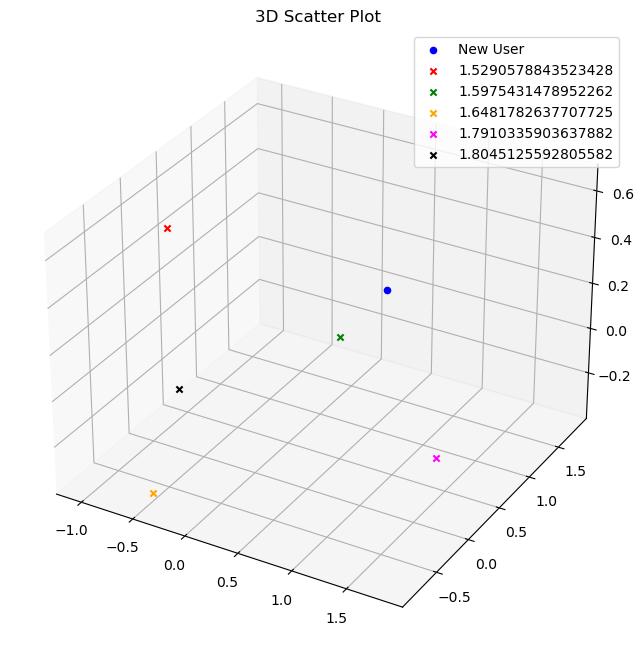

Similar users: ['U13' 'U15' 'U24' 'U3' 'U28']
distance: [1.52905788 1.59754315 1.64817826 1.79103359 1.80451256]
    user_id doctor_id  rating
0        U1       D17       3
1        U1       D14       4
2        U1       D24       2
3        U1       D18       4
4        U1       D11       2
..      ...       ...     ...
625     U50       D17       2
626     U50        D4       1
627     U50       D12       4
628     U50       D25       1
629     U50        D8       5

[630 rows x 3 columns]
435
RMSE for SVD: 1.2992612934153789
MAE for SVD: 1.1057070071123365
hello ['U13' 'U15' 'U24' 'U3' 'U28']
new distance: [1.80451256 1.79103359 1.64817826 1.59754315 1.52905788]
1.8045125592805582
0
1.7910335903637882
1
1.6481782637707725
2
1.5975431478952262
3
1.5290578843523428
4
im in
im in
im in
im in
im in
im in
Top 5 Recommended Doctors:
None
CMySQLCursor: select * from user
[('iva', '123', '9778384678', 'palachuvad house'), ('jiya', '132', '9778789008', 'palaguhnd house'), ('anu', '123', '949

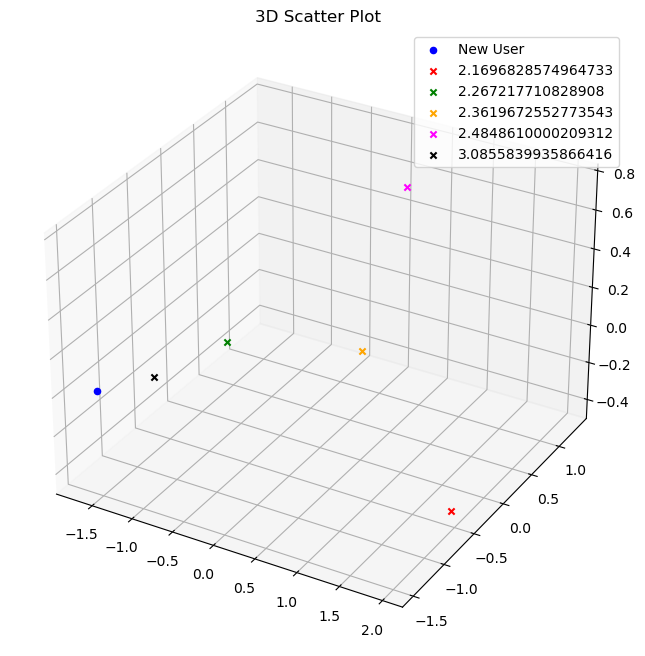

Similar users: ['U26' 'U5' 'U8' 'U2' 'U7']
distance: [2.16968286 2.26721771 2.36196726 2.484861   3.08558399]
    user_id doctor_id  rating
0        U1       D17       3
1        U1       D14       4
2        U1       D24       2
3        U1       D18       4
4        U1       D11       2
..      ...       ...     ...
625     U50       D17       2
626     U50        D4       1
627     U50       D12       4
628     U50       D25       1
629     U50        D8       5

[630 rows x 3 columns]
287
RMSE for SVD: 1.3297270920118531
MAE for SVD: 1.1156997676608587
hello ['U26' 'U5' 'U8' 'U2' 'U7']
new distance: [3.08558399 2.484861   2.36196726 2.26721771 2.16968286]
3.0855839935866416
0
2.4848610000209312
1
2.3619672552773543
2
2.267217710828908
3
2.1696828574964733
4
im in
im in
im in
im in
im in
im in
Top 5 Recommended Doctors:


In [4]:
from tkinter import *
import mysql.connector
import tkinter.messagebox
import tkinter.messagebox
import pandas as pd
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from surprise import accuracy
from surprise.model_selection import train_test_split


root = Tk()
root.geometry("1920x1080")
root.title("CardioCare")

mypass = "1234" 
mydatabase="db" 
con = mysql.connector.connect (host="localhost",user="root",password=mypass,database=mydatabase)
global repassword
print(con)
if(con):
    print("success")
else:
    print("noo")

cur = con.cursor() 


def login():
    global loginpage,login_user,login_password,login_login_b,login_newuser_b,login_f,newuser_f,profile_f,cardio_f
    newuser_f.destroy()
    cardio_f.destroy()
    recdoc_f.destroy()
    profpage_f.destroy()
   

    loginpage = PhotoImage(file = 'Login1.png')
    login_login_b = PhotoImage(file = 'login_b.png')
    login_newuser_b= PhotoImage(file = 'sign_b.png')

    login_f=Frame(root) 
    login_f.pack()
    login_c=Canvas(login_f,height=1080,width=1920,bg='#FFFFFF')
    login_c.pack(fill = "both",expand=True)
    
    login_c.create_image( 0, 0,image =loginpage,anchor=NW)
    
  
    login_user = Entry(login_c,width=25,font=('Poppins', 20, 'normal'), bg='#D6D6D6', bd=0)
    login_user.place(x=255, y=455)

    login_password = Entry(login_c,show='*',width=25, font=('Poppins', 20, 'normal'), bg='#D6D6D6', bd=0)
    login_password.place(x=255, y=539)

    login_b=Button(login_c,image=login_login_b,borderwidth=0,bg='#079BBB',command=login_sql,cursor='hand1')
    login_b.place(x=158, y=628)

    newuser_b=Button(login_c,image=login_newuser_b,borderwidth=0,bg='#079BBB',command=newuser,cursor='hand2')
    newuser_b.place(x=399, y=627)


def newuser():
    global newuser_bg,newuser_username,newuser_pw,newuser_rpw,newuser_city,newuser_ph,newuser_button
    global newuser_b,cardio_f,newuser_f,newuser_addr

    login_f.destroy()
    cardio_f.destroy()
    recdoc_f.destroy()
    profpage_f.destroy()
    
    
    newuser_f=Frame(root)
    newuser_f.pack()
    newuser_bg = PhotoImage(file = 'newuser1.png')
    newuser_button = PhotoImage(file = 'newuser_sub.png')
   
    newuser_c=Canvas(newuser_f,height=1080,width=1920,bg='#FFFFFF')
    newuser_c.create_image(0,0,image=newuser_bg,anchor=NW)
    newuser_c.pack(fill = "both",expand=True)
    newuser_username = Entry(newuser_c,width=25, font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    newuser_username.place(x=995, y=310)
    newuser_pw = Entry(newuser_c,width=25,show='*', font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    newuser_pw.place(x=995, y=416)
    newuser_rpw = Entry(newuser_c,width=25,show='*', font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    newuser_rpw.place(x=995, y=527)
    
    newuser_ph = Entry(newuser_c,width=25, font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    newuser_ph.place(x=995, y=647)
    newuser_addr = Entry(newuser_c,width=25, font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    newuser_addr.place(x=995, y=758)
    
    
    
    newuser_b=Button(newuser_c,image=newuser_button,borderwidth=0,bg='#018CAB',command=newuser_sql,cursor='hand1')
    newuser_b.place(x=1315, y=900)
def login_sql():
    global user,pass_get,query,ls,x

    userTable = "user" 
    user =login_user.get()
    pass_get = login_password.get()

    query =  "select * from "+userTable+" where uname = '"+user+"' and password = '"+pass_get+"' "
    cur.execute(query)
    
    ls= cur.fetchall()

    if(len(ls)!=0):
        name=ls[0][0]
        password=ls[0][1]
        print(name,password)
 
        print('login successful')
        cardio()
    else:
    
         tkinter.messagebox.showinfo("ERROR",  "Incorrect credentials")
         


def newuser_sql():
    username=newuser_username.get()
    password=newuser_pw.get()
    repassword=newuser_rpw.get()
    address=newuser_addr.get()
    phone=newuser_ph.get()
    if(password!='' and username!=''):
        if password==repassword:
            insertCars = "insert into user values ('"+username+"','"+password+"','"+phone+"','"+address+"')"
            cur.execute(insertCars)
            con.commit()
            login()
        else:
            tkinter.messagebox.showinfo("ERROR",  "Not the same password!!")
            print("errorr")
    else:
            tkinter.messagebox.showinfo("ERROR",  "PLEASE ENTER A VALID USERNAME AND PASSWORD")
    s="select * from user"
    q=cur.execute(s)
    print(q)
    print(cur)
    print(cur.fetchall())
    


def cardio():
    global cardio_bg,profpage_f,cardio_age,cardio_n,cardio_sex,cardio_cp,cardio_rbp,cardio_chol,cardio_fbs
    global cardio_recg,cardio_thl,cardio_exang,cardio_olp,cardio_slope,cardio_ca,cardio_thal,cardio_doc
    global cardio_sub,recdoc_f,cardio_f,cardio_next,cardio_c,profile_f,op_sex,cardio_sex,op_cp,op_exang,op_fbs,op_recg,op_thal,op_slope,op_ca
    profpage_f.destroy()
    login_f.destroy()
    newuser_f.destroy()
    profpage_f.destroy()
    recdoc_f.destroy()

    print('hello')
    cardio_f=Frame(root)
    cardio_f.pack()

    cardio_bg = PhotoImage(file = 'cardio_bg.png')
    cardio_sub = PhotoImage(file = 'newuser_sub.png')
    cardio_n= PhotoImage(file = 'next_sub.png')
    
    cardio_c=Canvas(cardio_f,height=1080,width=1920,bg='#FFFFFF')
    cardio_c.create_image(0,0,image=cardio_bg,anchor=NW)
    
    lsex=['male','female']
    lcp=['Atypical Angina','Typical Angina','Asymptotic','Symptotic']
    lfbs=['<120','>120']
    lrecg=['Normal','ST-T wave abnormalities','left ventricular hypertrophy']
    lexang=['No','Yes']
    lslope=['Unsloping','Flat','Down sloping']
    lthal=['Normal','Fixed','Reversible effect']
    lca=['Very low','Low','High','Very high']
    OPTIONS = lsex
    OPTIONS_CP=lcp
    OPTIONS_FBS=lfbs
    OPTIONS_RECG=lrecg
    OPTIONS_EXANG=lexang
    OPTIONS_SLOPE=lslope
    OPTIONS_THAL=lthal
    OPTIONS_CA=lca
    op_ca = StringVar()
    op_ca.set("Select option")
    op_thal = StringVar()
    op_thal.set("Select option")
    op_recg = StringVar()
    op_recg.set("Select option")
    op_exang = StringVar()
    op_exang.set("Select option")
    op_slope = StringVar()
    op_slope.set("Select option")
    op_fbs = StringVar()
    op_fbs.set("Select option")
    op_cp = StringVar()
    op_cp.set("Select option")
    op_sex = StringVar()
    op_sex.set("Select option")
    
    def clear_placeholder(event):
        current_text = cardio_rbp.get("1.0", "end-1c")
        if current_text == range_rbp:
            cardio_rbp.delete("1.0", "end")
    def clear_placeholder_chol(event):
        current_text = cardio_chol.get("1.0", "end-1c")
        if current_text == range_chol:
            cardio_chol.delete("1.0", "end")
    def clear_placeholder_thl(event):
        current_text = cardio_thl.get("1.0", "end-1c")
        if current_text == range_thl:
            cardio_thl.delete("1.0", "end")

    def clear_placeholder_olp(event):
        current_text = cardio_olp.get("1.0", "end-1c")
        if current_text == range_olp:
            cardio_olp.delete("1.0", "end")

   
    range_rbp = "94 - 200"
    range_chol = "126 - 564"
    range_thl = "71 - 202"
    range_olp = "0 - 6.2"
    
    cardio_c.pack(fill = "both",expand=True)
    cardio_age = Text(cardio_c,width=10,height=1, font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    cardio_age.place(x=575, y=42)
    cardio_sex = OptionMenu(cardio_c,op_sex,*OPTIONS)
    cardio_sex.place(x=575, y=140)
    cardio_cp = OptionMenu(cardio_c,op_cp,*OPTIONS_CP)
    cardio_cp.place(x=575, y=205)
    cardio_rbp = Text(cardio_c,width=10,height=1, font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    cardio_rbp.insert('end', range_rbp)
    cardio_rbp.place(x=575, y=257)
    cardio_rbp.bind("<FocusIn>", clear_placeholder)
    cardio_chol = Text(cardio_c,width=10,height=1, font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    cardio_chol.insert('end', range_chol)
    cardio_chol.bind("<FocusIn>", clear_placeholder_chol)
    cardio_chol.place(x=575, y=332)
    cardio_fbs = OptionMenu(cardio_c,op_fbs,*OPTIONS_FBS)
    cardio_fbs.place(x=575, y=423)
    cardio_recg = OptionMenu(cardio_c,op_recg,*OPTIONS_RECG)
    cardio_recg.place(x=575, y=498)
    cardio_thl = Text(cardio_c,width=10,height=1, font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    cardio_thl.insert('end', range_thl)
    cardio_thl.place(x=575,y=547)
    cardio_thl.bind("<FocusIn>", clear_placeholder_thl)
    cardio_exang = OptionMenu(cardio_c,op_exang,*OPTIONS_EXANG)
    cardio_exang.place(x=575, y=638)
    cardio_olp = Text(cardio_c,width=10,height=1, font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    cardio_olp.insert('end', range_olp)
    cardio_olp.place(x=575, y=693)
    cardio_olp.bind("<FocusIn>", clear_placeholder_olp)
    cardio_slope = OptionMenu(cardio_c,op_slope,*OPTIONS_SLOPE)
    cardio_slope.place(x=575, y=780)
    cardio_ca = OptionMenu(cardio_c,op_ca,*OPTIONS_CA)
    cardio_ca.place(x=575, y=850)
    cardio_thal = OptionMenu(cardio_c,op_thal,*OPTIONS_THAL)
    cardio_thal.place(x=575, y=928)

    
    cardio_doc = Text(cardio_c,width=20,height=3, font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    cardio_doc.place(x=1120, y=550)
    cardio_b=Button(cardio_c,image=cardio_sub,command=cardio_check,borderwidth=0,bg='#018CAB',cursor='hand1')
    cardio_b.place(x=1120, y=120)
  
    cardio_next=Button(cardio_c,image=cardio_n,borderwidth=0,bg='#018CAB',command=recdoc,cursor='hand2')
    cardio_next.place(x=1528, y=872)


def cardio_check():
    global cardio_rbp_value,cardio_chol_value
    print("cardio check works")
    cardio_rbp_value = cardio_rbp.get("1.0", "end-1c")
    cardio_chol_value = cardio_chol.get("1.0", "end-1c")


    if(cardio_age.get("1.0", "end-1c")=='' or op_sex.get()==''or cardio_rbp_value.strip()=='' or cardio_rbp_value=="94 - 200" or cardio_chol_value.strip()=='' or cardio_chol_value=="126 - 564"):
        tkinter.messagebox.showinfo("ERROR",  "*AGE,SEX,RESTING BP,CHOLESTEROL are required fields!!*")
        print("msg box donee")
    else:
        prediction()
        
def prediction():
    global risk_prediction
    global recdoc_bg,recdoc_loc,recdoc_doc,recdoc_sub,recdoc_b,recdoc_f,op_sex,op_cp,op_exang,op_fbs,op_recg,op_thal,op_slope,op_ca
    df = pd.read_csv('heartdisease.csv')
   
    df = pd.read_csv('heartdisease.csv', header = None)

    training_x=df.iloc[1:df.shape[0],0:13]
    #print(training_set)

    training_y=df.iloc[1:df.shape[0],13:14]
    #print(testing_set)


   
    x=np.array(training_x)
    y=np.array(training_y)
    

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(x)
  
    X_augmented = X_scaled.copy()
    y_augmented = y.copy()
    print(X_scaled[5])
    
    scale_range = (0.8, 1.2)

    # random scaling augmentation
    for i in range(len(x)):
        scale_factor = np.random.uniform(*scale_range)
        X_augmented[i] = X_scaled[i] * scale_factor

    # Concatenate augmented and original data
    X_combined = np.concatenate((X_scaled, X_augmented), axis=0)
    y_combined = np.concatenate((y, y_augmented), axis=0)



    
    a=cardio_age.get("1.0", "end-1c")
    age1=float(a)
   
    if(op_sex.get()=='male'):
        cardio_sex='1'
    else:
        cardio_sex='0'
        
 
 
    if(op_cp.get()=='Atypical Angina'):
        cardio_cp='1'
    elif(op_cp.get()=='Typical Angina'):
        cardio_cp='2'
    elif(op_cp.get()=='Asymptotic'):
        cardio_cp='3'
    elif(op_cp.get()=='Symptotic'):
        cardio_cp='4'
    else:
        cardio_cp='2'
       
 
    if(op_fbs.get()=='<120'):
        cardio_fbs='0'
    elif(op_fbs.get()=='>120'):
        cardio_fbs='1'
    else:
        cardio_fbs='0'
  
    if(op_recg.get()=='Normal'):
        cardio_recg='0'
    elif(op_recg.get()=='ST-T wave abnormalities'):
        cardio_recg='1'
    elif(op_recg.get()=='left ventricular hypertrophy'):
        cardio_recg='2'
    else:
        cardio_recg='0'
        
  
  
    if(op_exang.get()=='No'):
        cardio_exang='0'
    elif (op_exang.get()=='Yes'):
        cardio_exang='1'
    else:
        cardio_exang='0'
    colp=cardio_olp.get("1.0", "end-1c")
    if(op_slope.get()=='Unsloping'):
        cardio_slope='0'
    elif(op_slope.get()=='Flat'):
        cardio_slope='1'
    elif(op_slope.get()=='Down sloping'):
        cardio_slope='2'
    else:
        cardio_slope='1'
       
    if(op_thal.get()=='Normal'):
        cardio_thal='3'
    elif(op_thal.get()=='Fixed'):
        cardio_thal='6'
    elif(op_thal.get()=='Reversible effect'):
        cardio_thal='7'
    else:
        cardio_thal='7'

    #smoke    
    if(op_ca.get()=='Very low'):
        cardio_ca='0'
    elif(op_ca.get()=='Low'):
        cardio_ca='1'
    elif(op_ca.get()=='High'):
        cardio_ca='2'
    elif(op_ca.get()=='Very high'):
        cardio_ca='3'
    else:
        cardio_ca='0'
        
   
    a1=float(cardio_sex)
    b1=float(cardio_cp)
    e1=float(cardio_fbs)
    f1=float(cardio_recg)
    h1=float(cardio_exang)
    j1=float(cardio_slope)
    l1=float(cardio_thal)
    k1=float(cardio_ca)

    c1 = float(cardio_rbp.get("1.0", "end-1c"))
    d1 = float(cardio_chol.get("1.0", "end-1c"))
    crbp=cardio_rbp.get("1.0", "end-1c")
    cchol=cardio_chol.get("1.0", "end-1c")
    
    cthal=cardio_thl.get("1.0","end-1c")
    colp=cardio_olp.get("1.0","end-1c")

    if cthal.strip() != '' or cthal=='71 - 202':
        age_converted = float(cardio_age.get("1.0", "end-1c"))
        g1 = 220 - age_converted
        cthal=str(g1)

    else:

        age_converted = float(cardio_age.get("1.0", "end-1c"))
        g1 = 220 - age_converted

  
    cardio_olp_value = cardio_olp.get("1.0", "end-1c")
    if cardio_olp_value.strip() != '' or colp=='0 - 6.2':
       
        
        colp='0.2'
        i1=0.2

    else:
       
        i1 = 0.2


  
    global topass
    topass=[]
    
    
    #####
    import pickle
    model_loaded=pickle.load(open('model_pred','rb'))
    sc = StandardScaler()
    combined_list = [age1,a1, b1, c1, d1, e1, f1, g1, h1, i1, j1, k1, l1]
    topass=[age1,a1,c1,d1]
    print(combined_list)
    x=list(x)
    lt_transformed=x.append(combined_list)
    lt_transformed=np.array(x)
    s = sc.fit_transform(lt_transformed)
    lt_transformed = lt_transformed.astype('float64')
    lt_array = np.array(s[-1]).reshape(1, 13)
    m =model_loaded.predict(lt_array)
    m = [np.argmax(i) for i in m]
    print("Predicted heart disease:", m[0])
    p=''
    if m[0]==0:
        print("10% risk ")
        p='10% risk'
    elif m[0]==1:
        print("30% risk")
        p='30% risk'
    elif m[0]==2:
        print("50% risk")
        p='50% risk'
    elif m[0]==3:
        print("70% risk")
        p='70% risk'
    elif m[0]==4:
        print("90% risk")
        p='90% risk'
    print(p)
    
    result =Label(cardio_c,text=p, font=("Arial", 30),bg='#D6D6D6')
    result.place(x=1300, y=600)
    topass.append(float(m[0]))
    print(topass)  
    query =  "select * from user_details where uname = '"+user+"'"
    cur.execute(query)
    ls= cur.fetchall()
    if(len(ls)!=0):
        query2 = "UPDATE user_details SET prediction='"+str(m[0])+"' WHERE uname='"+str(user)+"'"
        cur.execute(query2)
        con.commit()  
    else:
    #print(type(user))
        print(cthal)
        print(cardio_thal)
        query1 = "INSERT INTO user_details VALUES ('" + str(user) + "','" + str(a) + "','" + str(cardio_sex) + "','" + str(cardio_cp) + "','" + str(crbp) + "','" + str(cchol) + "','" + str(cardio_fbs) + "','" + str(cardio_recg) + "','" + str(cthal) + "','" + str(cardio_exang) + "','" + str(colp) + "','" + str(cardio_slope) + "','" + str(cardio_ca) + "','" + str(cardio_thal) + "','" + str(m[0]) + "')"
        cur.execute(query1)
        con.commit()
from sklearn.decomposition import PCA
def find_similar_users(lt_array,X_scaled):
    df_u = pd.read_csv('users_final - Sheet1.csv')


    new_user_features = np.array(lt_array).reshape(1, -1)
    distances, indices = knn.kneighbors(new_user_features)
    similar_users = df_u.iloc[indices[0]]['user_id'].values
    distance = distances[0]
    print("distance:", distance)
    print(similar_users)

    similar_user_indices = indices[0]
    similar_user_distances = distances[0]
    similar_user_features = X_scaled[similar_user_indices]
    copy=similar_user_features
    new_user_feature_df = pd.DataFrame(new_user_features, columns=['age', 'sex', 'restbp', 'chol', 'num'])
   
    combined_df = pd.concat([new_user_feature_df] * (len(similar_user_indices) + 1))
    combined_df['User'] = ['New User'] + ['Similar User ' + str(i + 1) for i in range(len(similar_user_indices))]

    print(similar_user_features)
    print("hiiiii")
    
    print(new_user_features)
    copy_np = np.array(copy)


    new_copy = np.insert(copy_np, copy_np.shape[1], new_user_features[0], axis=1)
   
    print("copyyyyy")
    print(new_copy)
    
    
    pca_3d = PCA(n_components=3)
    copy_3d = pca_3d.fit_transform(new_copy)
    print(copy_3d[-1])
    copy_plot=copy_3d[-1]
   
    pca_3d = PCA(n_components=3)
    similar_user_features_3d = pca_3d.fit_transform(similar_user_features)
    print("hhhh",similar_user_features_3d)
    pca_3d = PCA(n_components=3)
    X_scaled_3d = pca_3d.fit_transform(X_scaled)
    
    pca_3d = PCA(n_components=3)
   
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
   
    ax.scatter(copy_plot[0], copy_plot[1], copy_plot[2], c='b', marker='o', label='New User')
    color=['r','g','orange','magenta','black']
    for i in range(len(similar_users)):
    
        ax.scatter(similar_user_features_3d[i, 0], similar_user_features_3d[i, 1], similar_user_features_3d[i, 2], c=color[i], marker='x' ,label=distance[i])
  
    

   
    ax.legend()
    plt.title('3D Scatter Plot')
    plt.show()

    return similar_users, distance



def knnmodel():
        global X_scaled
        df_u = pd.read_csv('users_final - Sheet1.csv')
        #print(df_u)
        training_x=df_u.iloc[1:df_u.shape[0],1:]
        print(training_x)
        x=np.array(training_x)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(x)
        print(X_scaled)
        from sklearn.neighbors import NearestNeighbors
        global X
        global distance
       
        k = 5
        global knn
     
        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(X_scaled)
        distance=[]
        ''''new_user_age=65
        new_user_sex=1
        new_user_restbp=155
        new_user_chol=280
        new_user_num=3'''
        new_user_age=topass[0]
        new_user_sex=topass[1]
        new_user_restbp=topass[2]
        new_user_chol=topass[3]
        new_user_num=topass[4]
        sc = StandardScaler()
        combined_list = [new_user_age,new_user_sex,new_user_restbp, new_user_chol,new_user_num]
        print(combined_list)
        x=list(x)
        lt_transformed=x.append(combined_list)
        lt_transformed=np.array(x)
        s = sc.fit_transform(lt_transformed)
        lt_transformed = lt_transformed.astype('float64')
        lt_array = np.array(s[-1]).reshape(1, 5)
        print(lt_array)
      
        similar_users,distance = find_similar_users(lt_array,X_scaled)
        print("Similar users:", similar_users)
        print("distance:", distance)
    
    
    
    
    

        from surprise import Dataset, Reader
        from surprise import SVD  
        
        
        
        dt = pd.read_csv('doctor_rating - Sheet1.csv')
        print(dt)
        reader = Reader(rating_scale=(0, 30))  
        data = Dataset.load_from_df(dt[['user_id', 'doctor_id', 'rating']], reader)
        val=0;
        ac=999;
        
        for i in range(500):
            trainset,testset = train_test_split(data, test_size=0.2,random_state=i)
            model = SVD()
            model.fit(trainset) 
            predictions = model.test(testset)
            rmse = accuracy.rmse(predictions,verbose=False)
            if(rmse<ac):
                ac=rmse;
                val=i;

        print(val)
        trainset, testset = train_test_split(data, test_size=0.2,random_state=val)
        model = SVD() 
        model.fit(trainset)  
        predictions = model.test(testset)
        #print("\n",predictions)
        rmse = accuracy.rmse(predictions,verbose=False)
        mae=accuracy.mae(predictions,verbose=False)
        print("RMSE for SVD:" ,rmse)
        print("MAE for SVD:" ,mae)


        top_n = 5  # Number of doctors to recommend
        print("hello",similar_users)
        recommended_doctors = []
        i=0;
        reversed_distance = distance[::-1]
        distance=reversed_distance.copy()
        print("new distance:", distance)
        
        for user in similar_users:
            predictions = []
            print(distance[i])
            print(i)
            for doctorid in dt['doctor_id'].unique():
                predicted_rating = model.predict(user, doctorid).est
                predicted_rating=predicted_rating*distance[i]

                predictions.append((doctorid, predicted_rating))

            predictions.sort(key=lambda x: x[1], reverse=True) 
            #print(predictions) # Sort predictions by rating
            i=i+1
           
            top_doctors = [(doctor_id, prediction) for doctor_id, prediction in predictions[:top_n]]
            #print(top_doctors)
            recommended_doctors.extend(top_doctors)
            recommended_doctors.sort(key=lambda x: x[1], reverse=True)
        
        doctor_details = pd.read_csv('doctor_details - Sheet1.csv')

       
        def get_doctor_info(doctor_id):
            print("im in")
            doctor_info = doctor_details[doctor_details['doctor_id'] == doctor_id]
            if not doctor_info.empty:
                return doctor_info.iloc[0]['doctor_name'], doctor_info.iloc[0]['doctor_no']
            else:
                return None, None

        unique_doctor_ids = set()
        top_5_doctors = []

       
        for doctor_id, _ in recommended_doctors:
            if doctor_id not in unique_doctor_ids:
               
                doctor_name, doctor_no = get_doctor_info(doctor_id)
                if doctor_name and doctor_no:
                    top_5_doctors.append((doctor_id, doctor_name, doctor_no))
                    unique_doctor_ids.add(doctor_id)

               
                if len(top_5_doctors) == 5:
                    break

       
        def display_doctors_details():
            
            print("im in")
          
            print("Top 5 Recommended Doctors:")
            for i, (doctor_id, doctor_name, doctor_no) in enumerate(top_5_doctors):
                doc_label = Label(recdoc_c, text=f"Doctor ID: {doctor_id}, Name: {doctor_name}, Phone: {doctor_no}", font=("Arial", 14), bg='#D6D6D6')
                doc_label.place(x=300, y=400 + i * 30)


        
        display_doctors_details()
        

def recdoc():
    global recdoc_bg,recdoc_doc,recdoc_sub,recdoc_b,recdoc_f,recdoc_c,rec_logout,rec_home,pro_b,recdoc_logout,recdoc_pro,recdoc_home,profpage_f

    cardio_f.destroy()
    login_f.destroy()
    newuser_f.destroy()
    profpage_f.destroy()

    recdoc_f=Frame(root)
    recdoc_f.pack()

    recdoc_bg = PhotoImage(file = 'rec_bg.png')
    recdoc_sub = PhotoImage(file = 'rec_b.png')
    recdoc_logout = PhotoImage(file = 'log_b.png')
    recdoc_home= PhotoImage(file = 'home_b.png')
    recdoc_pro =PhotoImage(file = 'prof_icon.png')
    
    recdoc_c=Canvas(recdoc_f,height=1080,width=1920,bg='#FFFFFF')
    recdoc_c.create_image(0,0,image=recdoc_bg,anchor=NW)
    recdoc_c.pack(fill = "both",expand=True)


    recdoc_doc = Text(recdoc_c,width=50,height=7, font=('Poppins', 40, 'normal'), bg='#D6D6D6', bd=0)
    recdoc_doc.place(x=202, y=347)
    recdoc_b=Button(recdoc_c,image=recdoc_sub,command=knnmodel,borderwidth=2,bg='#018CAB',cursor='hand1')
    recdoc_b.place(x=202, y=200)

    rec_home=Button(recdoc_c,image=recdoc_home,borderwidth=0,bg='#015467',command=cardio,cursor='hand2')
    rec_home.place(x=1436,y=20)
    
    pro_b=Button(recdoc_c,image=recdoc_pro,borderwidth=0,bg='#013C49',command=profile,cursor='hand2')
    pro_b.place(x=1606, y=20)

    rec_logout=Button(recdoc_c,image=recdoc_logout,borderwidth=0,bg='#013C49',command=login,cursor='hand2')
    rec_logout.place(x=1800, y=20)

def profile():
    global profpage,prof_logout,prof_home,logout_b,profpage_c,rec_home,profpage_f,user,risk_prediction
    
    cardio_f.destroy()
    login_f.destroy()
    newuser_f.destroy()
    recdoc_f.destroy()

    profpage_f=Frame(root) 
    profpage_f.pack()

    profpage = PhotoImage(file = 'profile_bg.png')
    prof_logout = PhotoImage(file = 'log_b.png')
    prof_home= PhotoImage(file = 'home_b.png')
    cardio_n= PhotoImage(file = 'next_sub.png') 
    
    
    profpage_c=Canvas(profpage_f,height=1080,width=1920,bg='#FFFFFF')
    profpage_c.create_image( 0, 0,image =profpage,anchor=NW)
    profpage_c.pack(fill = "both",expand=True)
    userTable = "user" 
    query =  "select * from "+userTable+" where uname = '"+user+"' and password = '"+pass_get+"' "
    cur.execute(query)
    ls= cur.fetchall()
    if(len(ls)!=0):
        name=ls[0][0]
        password=ls[0][1]
        phone=ls[0][2]
        address=ls[0][3]
    user_detailsTable="user_details"
    query1=  "select * from "+user_detailsTable+" where uname = '"+user+"'"
    cur.execute(query1)
    ls1=cur.fetchall()
    if(len(ls1)!=0):
        risk_prediction=ls1[0][14]
    if risk_prediction=='0':
        risk_prediction='10% risk'
    elif risk_prediction=='1':
        risk_prediction='30% risk'
    elif risk_prediction=='2':
        risk_prediction='50% risk'
    elif risk_prediction=='3':
        risk_prediction='70% risk'
    elif risk_prediction=='4':
        risk_prediction='90% risk'
    prof_name =Label(profpage_c,text=name, font=("Arial", 30),bg='#FFFFFF')
    prof_name.place(x=853, y=396)
    prof_phone=Label(profpage_c,text=phone, font=("Arial", 30),bg='#FFFFFF')
    prof_phone.place(x=849, y=468)
    prof_address=Label(profpage_c,text=address, font=("Arial", 30),bg='#FFFFFF')
    prof_address.place(x=853, y=540)
    prof_risk=Label(profpage_c,text=risk_prediction, font=("Arial", 30),bg='#FFFFFF')
    prof_risk.place(x=853, y=612)
    
    rec_home=Button(profpage_c,image=prof_home,borderwidth=0,bg='#015467',command=cardio,cursor='hand2')
    rec_home.place(x=1436,y=20)

    #home_b=Button(profpage_c,image=prof_home,borderwidth=0,bg='#015467',command=cardio,cursor='hand2')
    #home_b.place(x=1436,y=25)

    logout_b=Button(profpage_c,image=prof_logout,borderwidth=0,bg='#013C49',command=login,cursor='hand2')
    logout_b.place(x=1800, y=25)

    
loginpage = PhotoImage(file = "login1.png")
login_f=Frame(root)
login_f.pack()

login_f = Frame(root) 
homepage_f=Frame(root) 
homepage_f.pack()

newuser_f=Frame(root)
newuser_f.pack()

cardio_f=Frame(root)
cardio_f.pack

recdoc_f =Frame(root)
recdoc_f.pack
profpage_f =Frame(root)
profpage_f.pack()

login()

root.mainloop()